Tugas Besar Machine Learning

- Nama : Faisal Ridwan Siregar
- NIM : 1301174010
    
Classification - Machine Learning 
Dataset Used Cars

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#KFold Cross Validation
from sklearn.model_selection import KFold

## Membaca Dataset Used_Cars

In [18]:
#membaca semua isi dataset
df = pd.read_csv("used_carse.csv")
pd.set_option('display.max_columns',None)
df.head()

,no,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [19]:
#melihat isi total dataset
df_p = df.copy()
df.shape

(20001, 26)

In [20]:
# ASUMSI menjadikan fuel jadi class
df.fuel.unique()

array(['gas', 'diesel', 'other', nan, 'electric', 'hybrid'], dtype=object)

## PRE-PROCESSING
### Cleaning Data
- Memeriksa nilai data yang null dan menggantinya ke nilai 0
- Menghapus Fitur yang tidak ada hubungannya dengan Kelas (fuel)
- Memeriksa nilai yang mempunyai kategori lalu melakukan Fit Transorm

#### Memeriksa nilai data yang null dan menggantinya ke nilai 0

In [21]:
#melihat isi data yang null/NaN di setiap kolom
df.isna().sum()

no                  0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64

In [22]:
# Ganti Nilai Null/NaN untuk semua kolom tipe bilangan bulat ke nol
coloumns = [
    'year',
    'manufacturer',
    'model',
    'condition',
    'cylinders',
    'odometer',
    'title_status',
    'transmission',
    'vin',
    'drive',
    'size',
    'type',
    'paint_color',
    'image_url',
    'description',
    'county',
    'state',
    'lat',
    'long',
]

for col in coloumns:
    df_p.loc[df_p[col].isnull(), col] = 0
    
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

fuel  =  73


In [23]:
# Menghapus data yang memiliki nilai Null di kolom fuel
null_col = [
    'fuel',
]
df_p = df_p.dropna(subset=null_col)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

#### Menghapus Fitur yang tidak ada hubungannya dengan Kelas (fuel)

In [24]:
# Hapus fitur yang tidak ada hubungannya dengan fuel
coloumns = [
    'no',
    'id',
    'url',
    'region_url',
    'vin',
    'image_url',
    'description',
    'county',
]

for col in coloumns:
    df_p = df_p.drop(col, axis=1)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

In [25]:
df_p

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,ut,40.7372,-111.858
1,salt lake city,0,2016.0,ford,f-150,excellent,0,gas,10.0,clean,automatic,4wd,0,0,0,ut,40.5881,-111.884
2,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,0,gas,7554.0,clean,automatic,4wd,0,0,white,ut,40.5881,-111.884
3,salt lake city,0,2016.0,ford,f-150,excellent,0,gas,10.0,clean,automatic,4wd,0,0,0,ut,40.5881,-111.884
4,salt lake city,49999,2018.0,ford,f-450,0,0,diesel,70150.0,clean,automatic,4wd,0,pickup,white,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,kennewick-pasco-richland,49999,2016.0,ram,cummin 2500 laramie,0,0,diesel,43406.0,clean,automatic,4wd,0,truck,grey,wa,46.2348,-119.128
19997,kennewick-pasco-richland,12127,2018.0,nissan,sentra,0,4 cylinders,gas,32867.0,clean,automatic,fwd,0,sedan,0,wa,46.5642,-120.496
19998,kennewick-pasco-richland,0,2019.0,jeep,grand cherokee limited,0,6 cylinders,gas,17514.0,clean,automatic,4wd,0,SUV,0,wa,46.0783,-118.293
19999,kennewick-pasco-richland,14661,2017.0,toyota,corolla,0,4 cylinders,gas,30486.0,clean,automatic,fwd,0,sedan,0,wa,46.5642,-120.496


In [26]:
b_fit = df_p.fuel.unique()

#### Memeriksa nilai yang mempunyai kategori lalu melakukan Fit Transorm

In [27]:
# Mengubah nilai di dalam list int menjadi list string
df_p['manufacturer'] = list(map(str, df_p['manufacturer']))
df_p['condition'] = list(map(str, df_p['condition']))
df_p['model'] = list(map(str, df_p['model']))
df_p['cylinders'] = list(map(str, df_p['cylinders']))
df_p['title_status'] = list(map(str, df_p['title_status']))
df_p['transmission'] = list(map(str, df_p['transmission']))
df_p['drive'] = list(map(str, df_p['drive']))
df_p['size'] = list(map(str, df_p['size']))
df_p['type'] = list(map(str, df_p['type']))
df_p['paint_color'] = list(map(str, df_p['paint_color']))
df_p['state'] = list(map(str, df_p['state']))

In [28]:
# Ganti nilai kategori dengan angka yang dapat dihitung
le = LabelEncoder()

df_p['region'] = le.fit_transform(df_p['region'])
df_p['size'] = le.fit_transform(df_p['size'])
df_p['condition'] = le.fit_transform(df_p['condition'])
df_p['fuel'] = le.fit_transform(df_p['fuel'])
df_p['model'] = le.fit_transform(df_p['model'])
df_p['manufacturer'] = le.fit_transform(df_p['manufacturer'])
df_p['cylinders'] = le.fit_transform(df_p['cylinders'])
df_p['title_status'] = le.fit_transform(df_p['title_status'])
df_p['transmission'] = le.fit_transform(df_p['transmission'])
df_p['drive'] = le.fit_transform(df_p['drive'])
df_p['type'] = le.fit_transform(df_p['type'])
df_p['paint_color'] = le.fit_transform(df_p['paint_color'])
df_p['state'] = le.fit_transform(df_p['state'])

In [29]:
a_fit = df_p.fuel.unique()

In [30]:
klasifikasi_arr = [b_fit, a_fit]
print(klasifikasi_arr)

[array(['gas', 'diesel', 'other', 'electric', 'hybrid'], dtype=object), array([2, 0, 4, 1, 3], dtype=int64)]


### Dataset Yang sudah berhasil di clean

In [31]:
df_p.to_excel("gambar/Dataset Classification clean.xlsx")
df_p

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,12,17899,2012.0,39,2191,1,4,2,63500.0,1,2,1,1,5,1,0,40.7372,-111.858
1,12,0,2016.0,13,1759,1,0,2,10.0,1,1,1,0,0,0,0,40.5881,-111.884
2,12,46463,2015.0,14,3277,1,0,2,7554.0,1,1,1,0,0,11,0,40.5881,-111.884
3,12,0,2016.0,13,1759,1,0,2,10.0,1,1,1,0,0,0,0,40.5881,-111.884
4,12,49999,2018.0,13,1838,0,0,0,70150.0,1,1,1,0,9,11,0,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,5,49999,2016.0,33,1375,0,0,0,43406.0,1,1,1,0,11,6,3,46.2348,-119.128
19997,5,12127,2018.0,30,3234,0,4,2,32867.0,1,1,2,0,10,0,3,46.5642,-120.496
19998,5,0,2019.0,20,2218,0,6,2,17514.0,1,1,1,0,1,0,3,46.0783,-118.293
19999,5,14661,2017.0,38,1272,0,4,2,30486.0,1,1,2,0,10,0,3,46.5642,-120.496


In [32]:
# Split data menjadi 25% Data Test dan 75% Data Train
X_le = df_p.drop('fuel', axis=1)
X_le = X_le.drop('manufacturer', axis=1)
y = df_p['fuel']
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size=0.25, random_state=0)

### Memeriksa korelasi antar kolom

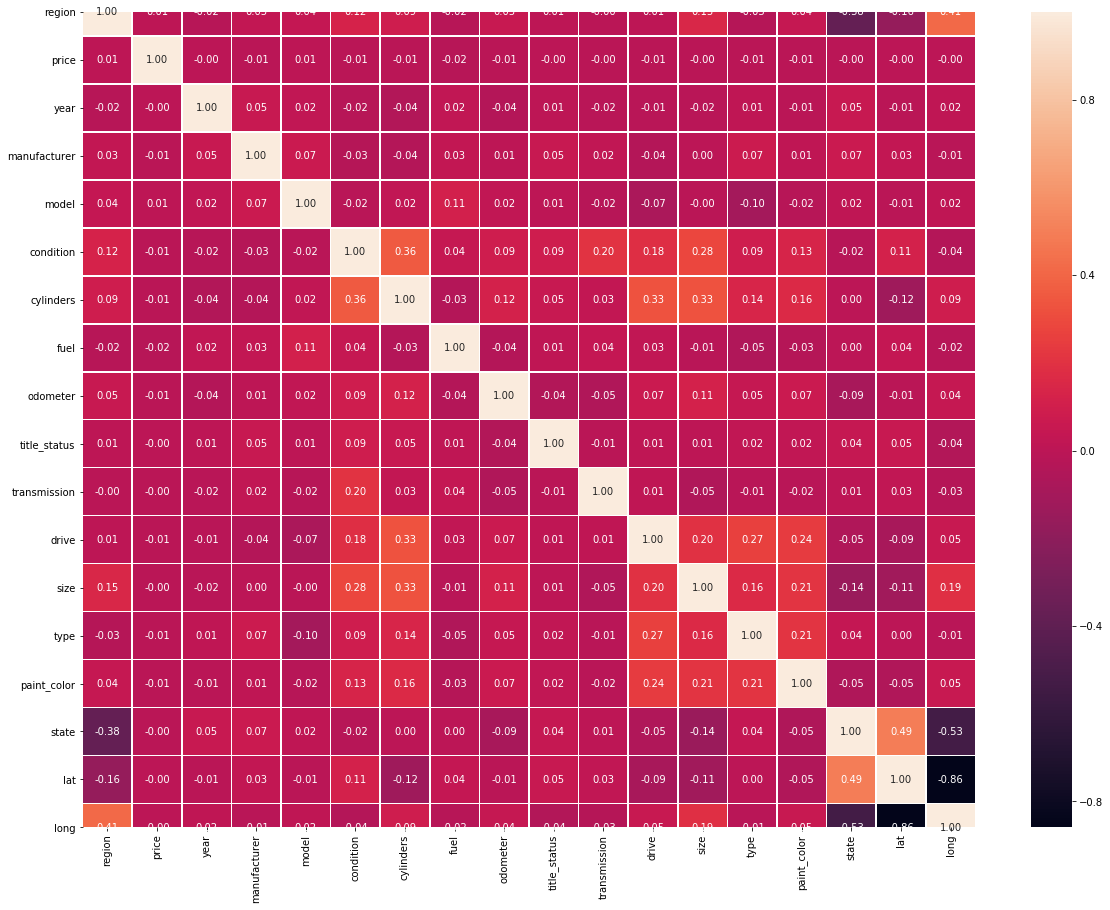

In [33]:
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns_plot = sns.heatmap(df_p.corr(), annot=True, fmt='.2f',linewidths=.5,ax=ax)
fig = sns_plot.get_figure()
fig.savefig("gambar/Output Korelasi Gambar.png")

## MODELING

In [34]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred) * 100 ,'%')
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    

In [35]:
report = Report(X_test, y_test)

### Classification dengan Random Forest Model

In [37]:
# Random Forest Model
rf = RandomForestClassifier().fit(X_train, y_train)
report.metrics(rf)

C:\Users\Faisal Ridwan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score:

95.16258530710559 %

Confusion Matrix:

[[ 290    0  118    0    1]
 [   0    2    2    0    0]
 [  40    0 4380    2    9]
 [   1    0   23   15    0]
 [   6    0   39    0   54]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       409
           1       1.00      0.50      0.67         4
           2       0.96      0.99      0.97      4431
           3       0.88      0.38      0.54        39
           4       0.84      0.55      0.66        99

    accuracy                           0.95      4982
   macro avg       0.91      0.63      0.72      4982
weighted avg       0.95      0.95      0.95      4982



### Classification dengan Decision Tree Model

In [36]:
# Decision Tree Model dengan max_depth = 9
dt = DecisionTreeClassifier(max_depth=9).fit(X_train, y_train)
report.metrics(dt)

Accuracy score:

92.47290244881574 %

Confusion Matrix:

[[ 204    0  198    1    6]
 [   0    2    2    0    0]
 [  57    0 4361    4    9]
 [   1    0   23   14    1]
 [   5    0   68    0   26]]

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.50      0.60       409
           1       1.00      0.50      0.67         4
           2       0.94      0.98      0.96      4431
           3       0.74      0.36      0.48        39
           4       0.62      0.26      0.37        99

    accuracy                           0.92      4982
   macro avg       0.81      0.52      0.62      4982
weighted avg       0.92      0.92      0.92      4982



### Classification dengan KNN Model

In [38]:
#KNN Model
knn = KNeighborsClassifier().fit(X_train, y_train)
report.metrics(knn)

Accuracy score:

89.88358089120835 %

Confusion Matrix:

[[ 186    0  222    0    1]
 [   1    1    2    0    0]
 [ 126    1 4279   10   15]
 [   2    0   30    7    0]
 [   8    0   86    0    5]]

Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.45      0.51       409
           1       0.50      0.25      0.33         4
           2       0.93      0.97      0.95      4431
           3       0.41      0.18      0.25        39
           4       0.24      0.05      0.08        99

    accuracy                           0.90      4982
   macro avg       0.53      0.38      0.42      4982
weighted avg       0.88      0.90      0.89      4982



In [150]:
# Cetak Random Forest Model yang memiliki akurasi lebih tinggi
y_pred = rf.predict(X_test)
hasil = [y_pred, y_test]
df_hasil = pd.DataFrame(hasil, index=['Predicted','Actual']) 
df_hasil.to_excel("gambar/Random Forest Model.xlsx")
df_hasil

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  \
Predicted  2  2  2  2  0  2  2  2  2  2   2   2   2   2   2   2   2   2   2   
Actual     2  2  2  2  4  2  2  2  2  2   2   2   2   2   2   2   2   2   2   

           19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
Predicted   2   2   2   2   2   2   2   4   2   0   2   2   0   2   2   2   2   
Actual      2   2   2   2   2   2   2   4   2   0   2   2   0   2   2   2   2   

           36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  \
Predicted   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   
Actual      2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   

           53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  \
Predicted   2   0   2   2   2   2   2   2   2   2   2   2   0   2   2   2   0   
Actual      2   0   2   2   2   2   2   2   2   2   2   2   0   2   2   2   0   

           70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  \
Predicted   0   2   2   2   2   2   2   2   2   0   2   2   2   2   2   2   2   
Actual      0   2   2   2   2   2   2   2   2   0   2   2   2   2   2   2   2   

           87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  \
Predicted   2   0   0   2   2   2   2   2   2   2   2   2   2    0    2    2   
Actual      2   0   0   2   2   2   2   2   2   2   2   2   2    0    2    2   

           103  104  105  106  107  108  109  110  111  112  113  114  115  \
Predicted    2    0    2    2    2    2    2    2    2    2    2    2    2   
Actual       2    0    2    2    2    2    2    2    2    2    2    2    2   

           116  117  118  119  120  121  122  123  124  125  126  127  128  \
Predicted    4    2    2    2    2    2    2    2    2    2    2    2    0   
Actual       4    2    2    2    2    2    2    2    2    2    2    2    0   

           129  130  131  132  133  134  135  136  137  138  139  140  141  \
Predicted    2    2    4    2    2    2    2    2    0    2    2    2    2   
Actual       2    2    2    2    2    2    2    2    2    2    2    2    2   

           142  143  144  145  146  147  148  149  150  151  152  153  154  \
Predicted    2    2    2    2    2    2    2    2    2    0    2    2    2   
Actual       2    2    2    2    2    3    2    2    2    2    2    2    2   

           155  156  157  158  159  160  161  162  163  164  165  166  167  \
Predicted    2    2    2    2    2    2    2    2    2    2    2    2    2   
Actual       2    2    2    2    2    2    2    2    2    2    2    2    2   

           168  169  170  171  172  173  174  175  176  177  178  179  180  \
Predicted    2    2    2    3    2    2    2    0    0    2    2    2    2   
Actual       2    2    2    3    2    2    2    4    0    2    2    2    2   

           181  182  183  184  185  186  187  188  189  190  191  192  193  \
Predicted    2    2    2    2    2    2    2    2    4    2    0    2    2   
Actual       2    2    2    2    2    2    2    2    4    2    0    2    2   

           194  195  196  197  198  199  200  201  202  203  204  205  206  \
Predicted    2    2    2    2    2    2    2    2    2    2    0    0    2   
Actual       2    2    2    2    2    2    2    2    2    2    2    0    2   

           207  208  209  210  211  212  213  214  215  216  217  218  219  \
Predicted    0    2    2    2    2    2    2    2    2    2    2    2    2   
Actual       0    2    2    2    2    2    2    2    2    2    2    2    2   

           220  221  222  223  224  225  226  227  228  229  230  231  232  \
Predicted    2    2    2    4    2    2    2    2    0    2    2    2    2   
Actual       2    2    4    4    2    2    2    2    0    2    2    2    2   

           233  234  235  236  237  238  239  240  241  242  243  244  245  \
Predicted    2    2    2    2    2    2    2    2    2    2    2    2    2   
Actual       2    2    2    2    2    2    2    2 

# VALIDATION

In [151]:
# melakukan kfold cross validationn
score = cross_val_score(rf, X_train, y_train, cv=20)
print(score * 100 )
print('Mean Score Validation : ',score.mean() * 100 , '%')
print('STD Score Validation : ',score.std()  * 100 , '%')

[94.93333333 93.06666667 95.73333333 94.53333333 93.46666667 94.39252336
 94.78609626 95.18716578 93.97590361 94.51137885 93.97590361 94.36997319
 95.17426273 94.23592493 94.50402145 94.10187668 95.5704698  95.16778523
 94.36241611 95.16778523]
Mean Score Validation :  94.56084100823104 %
STD Score Validation :  0.6568779427647012 %


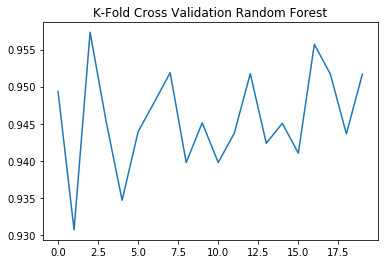

In [152]:
plt.title('K-Fold Cross Validation Random Forest')
plt.plot(score)
plt.savefig("gambar/Classification K-Fold Cross Validation Random Forest.png")